In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Function to load the dataset
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

# Function to clean the dataset and preprocess
def preprocess_data(df):
    # Handle categorical 'diagnosis' column if it exists
    if 'diagnosis' in df.columns:
        df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Convert 'M' -> 1, 'B' -> 0

    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    
    df = pd.get_dummies(df, drop_first=True)  # One-hot encoding 
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    return scaled_data

In [3]:
# Function to perform K-Means clustering and plot the results
def perform_kmeans_clustering(df, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    
    # Plot 
    plt.figure(figsize=(10, 6))
    plt.scatter(df[:, 0], df[:, 1], c=clusters, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    return kmeans, clusters


In [4]:
# Function to plot silhouette score
def plot_silhouette_score(df, range_n_clusters=range(2, 11)):
    scores = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(df)
        score = silhouette_score(df, clusters)
        scores.append(score)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, scores, marker='o')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

In [5]:
# Function to plot a bar chart for a feature
def plot_barchart(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[column_name].value_counts().index, y=df[column_name].value_counts().values)
    plt.title(f'Bar Chart of {column_name}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

In [6]:
# Function to plot scatter plot between two features
def plot_scatter(df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature1], y=df[feature2])
    plt.title(f'Scatter Plot between {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()


In [7]:
# Function to plot heatmap of the correlation matrix
def plot_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Heatmap of Feature Correlations')
    plt.show()


In [8]:
# Function to perform linear regression and plot the fitting line
def perform_linear_regression(df, feature1, feature2):
    X = df[[feature1]]
    y = df[feature2]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Fitted Line')
    plt.title(f'Linear Regression: {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

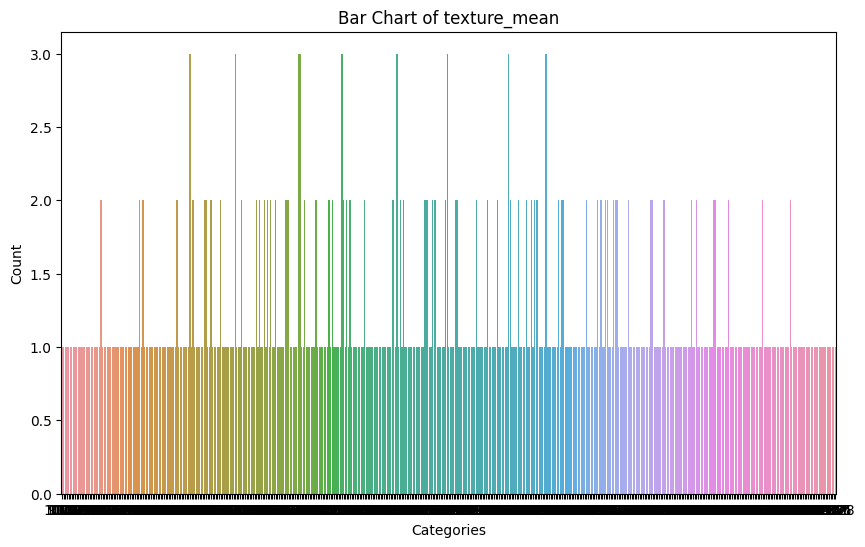

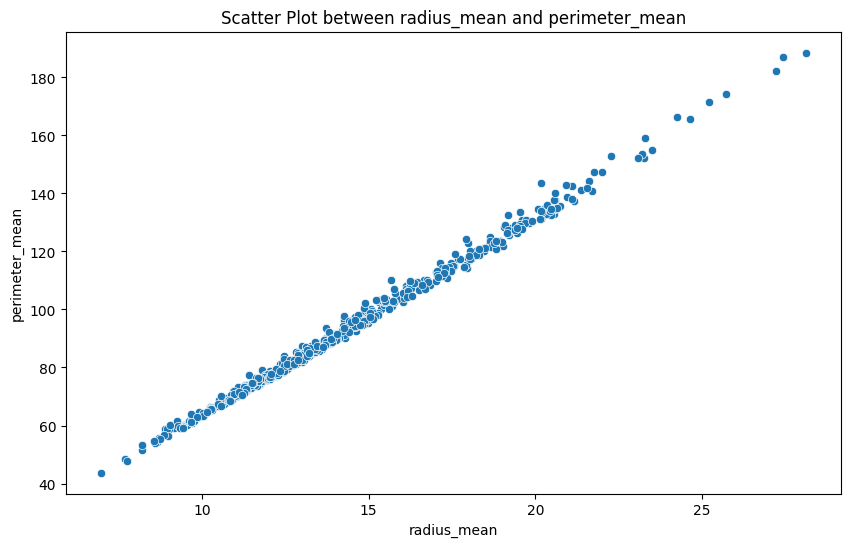

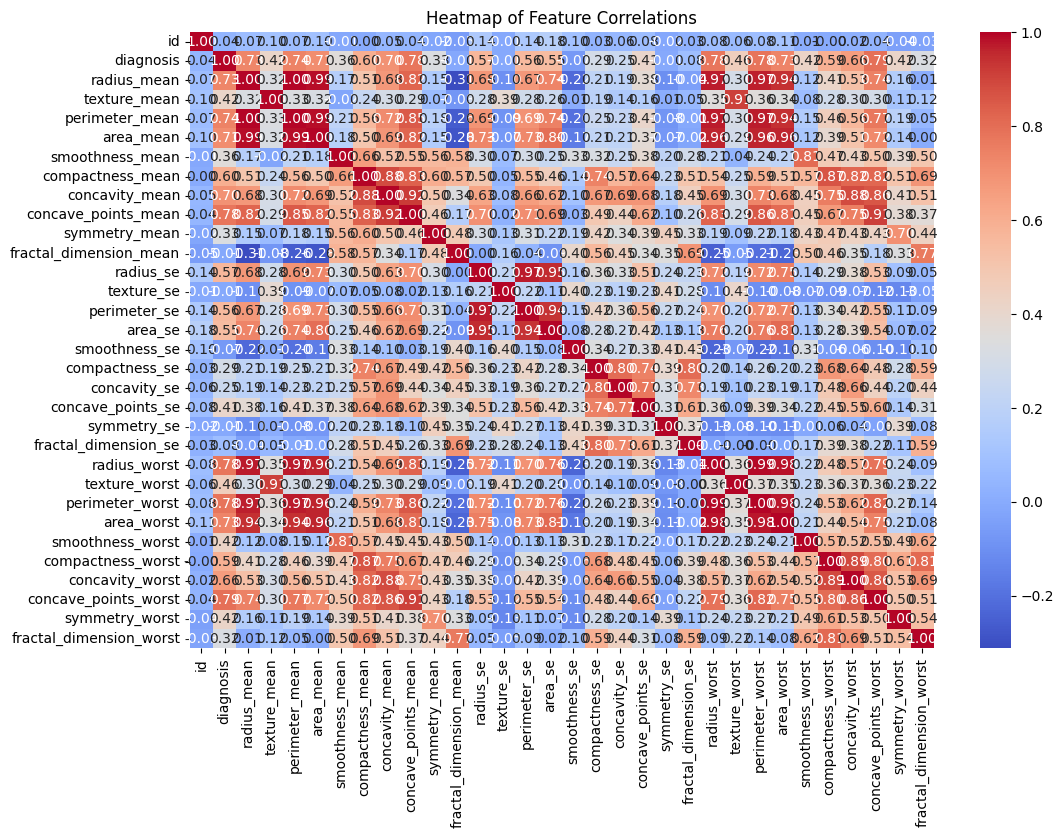

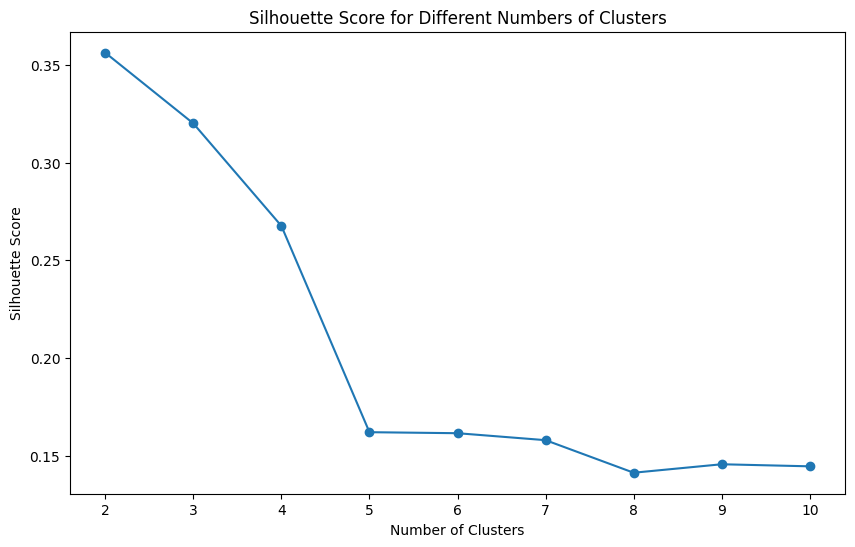

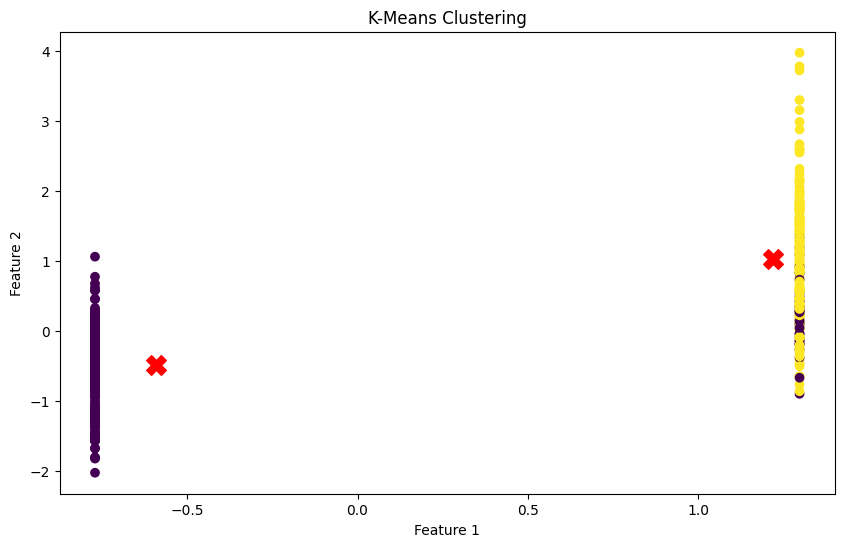

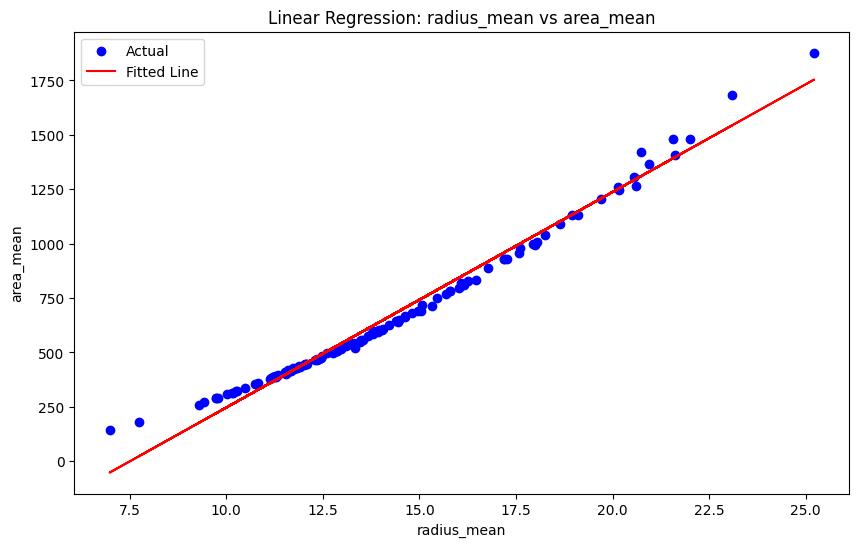

In [9]:
# Main function to run the entire analysis
def main():
    # Load and preprocess the dataset
    df = load_dataset('breast_cancer_data.csv')
    scaled_data = preprocess_data(df)
    
    # Plot a bar chart for a feature
    plot_barchart(df, 'texture_mean')
    
    # Scatter plot between two features
    plot_scatter(df, 'radius_mean', 'perimeter_mean')
    
    # Plot heatmap of correlations
    plot_heatmap(df)
    
    # Plot Silhouette Score for various clusters
    plot_silhouette_score(scaled_data)
    
    # Perform KMeans Clustering
    kmeans, clusters = perform_kmeans_clustering(scaled_data)
    
    # Perform linear regression
    perform_linear_regression(df, 'radius_mean', 'area_mean')

# Run the analysis
if __name__ == '__main__':
    main()